# Multiple Linear Regression

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

## Loading Data

In [2]:
dataframe = pd.read_csv("Advertising.csv")

In [3]:
dataframe.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
dataframe.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
dataframe.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
dataframe.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [7]:
dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Splitting Data

In [8]:
features = ["TV", "Radio", "Newspaper"]
X = dataframe[features]
target = "Sales"
y = dataframe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [9]:
y_mean = y_train.mean()
print("Mean Error: ", y_mean)
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline Error: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", mae_baseline)

Mean Error:  14.099999999999998
Baseline Error:  [14.099999999999998, 14.099999999999998, 14.099999999999998, 14.099999999999998, 14.099999999999998]
MAE Baseline:  4.12


### Model Instantiation

In [10]:
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

#### Predicitions on Training Data

In [11]:
y_pred_training = model.predict(X_train)
print("Predicted values after model: ", y_pred_training[:5])
mae_pred_training = mean_absolute_error(y_train, y_pred_training)
print("MAE for training data after prediction: ", mae_pred_training)

Predicted values after model:  [ 9.68827502 12.67337707 10.0553326   8.20010235 13.49562077]
MAE for training data after prediction:  1.1984678961500137


#### Predictions on Test Data

In [12]:
y_pred_test = model.predict(X_test)
print("Predicted values after model: ", y_pred_test[:5])
mae_pred_test = mean_absolute_error(y_test, y_pred_test)
print("MAE for test data after prediction: ", mae_pred_test)

Predicted values after model:  [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]
MAE for test data after prediction:  1.4607567168117601


##### Extract Intercept

In [13]:
intercept = model.intercept_
intercept

2.9790673381226256

##### Extract Coefficient

In [14]:
coefficient = model.coef_
coefficient

array([0.04472952, 0.18919505, 0.00276111])

## Multi-LinearRegression Equation

In [15]:
print(f"Sales = {intercept} + {coefficient[0]} * TV + {coefficient[1]} * Radio + {coefficient[2]} * Newspaper")

Sales = 2.9790673381226256 + 0.04472951746871633 * TV + 0.18919505423437669 * Radio + 0.0027611143413671657 * Newspaper


## Model Evaluation

In [16]:
print("Score of training data: ", model.score(X_train, y_train))
print("Score of test data: ", model.score(X_train, y_train))

Score of training data:  0.8957008271017817
Score of test data:  0.8957008271017817


## Actual vs Prediction [Training Data]

Text(0.5, 1.0, 'Actual vs Predicted [Training Data]')

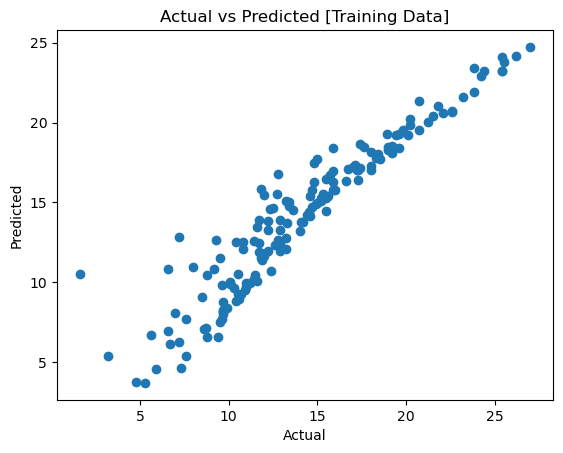

In [17]:
plt.scatter(y_train, y_pred_training)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Training Data]")

## Actual vs Prediction [Test Data]

Text(0.5, 1.0, 'Actual vs Predicted [Test Data]')

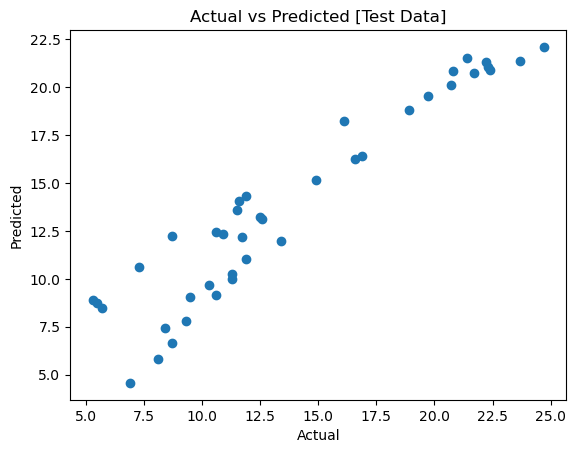

In [18]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted [Test Data]")

## Dataframe of Actual vs Predicted Sales

In [19]:
y_pred_test_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test})
y_pred_test_df.head()

,Actual,Predicted
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
